In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from numpy.linalg import norm
from jupyterthemes import jtplot
jtplot.style(theme="grade3", context="notebook", ticks=True, grid=False)

In [24]:
df = pd.read_csv("weatherHistory.csv")

In [25]:
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [27]:
df.duplicated().sum() # 24 Duplicated Records

24

In [28]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96429 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96429 non-null  object 
 1   Summary                   96429 non-null  object 
 2   Precip Type               95912 non-null  object 
 3   Temperature (C)           96429 non-null  float64
 4   Apparent Temperature (C)  96429 non-null  float64
 5   Humidity                  96429 non-null  float64
 6   Wind Speed (km/h)         96429 non-null  float64
 7   Wind Bearing (degrees)    96429 non-null  float64
 8   Visibility (km)           96429 non-null  float64
 9   Loud Cover                96429 non-null  float64
 10  Pressure (millibars)      96429 non-null  float64
 11  Daily Summary             96429 non-null  object 
dtypes: float64(8), object(4)
memory usage: 9.6+ MB


In [29]:
df.isna().sum() # 517 Null Records Can be Dropped

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [30]:
df = df.dropna()

In [31]:
df.isna().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95912 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            95912 non-null  object 
 1   Summary                   95912 non-null  object 
 2   Precip Type               95912 non-null  object 
 3   Temperature (C)           95912 non-null  float64
 4   Apparent Temperature (C)  95912 non-null  float64
 5   Humidity                  95912 non-null  float64
 6   Wind Speed (km/h)         95912 non-null  float64
 7   Wind Bearing (degrees)    95912 non-null  float64
 8   Visibility (km)           95912 non-null  float64
 9   Loud Cover                95912 non-null  float64
 10  Pressure (millibars)      95912 non-null  float64
 11  Daily Summary             95912 non-null  object 
dtypes: float64(8), object(4)
memory usage: 9.5+ MB


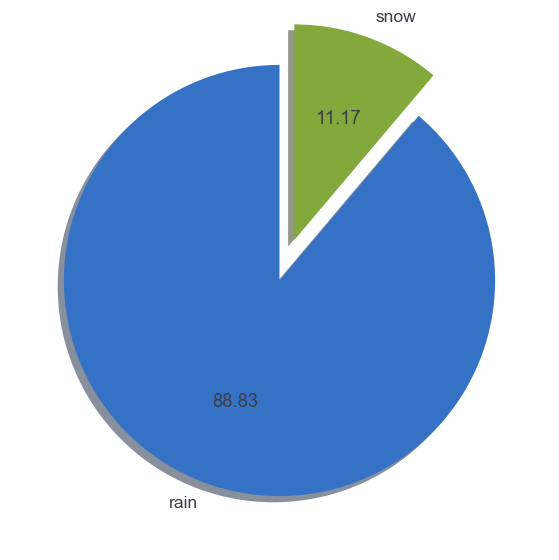

In [33]:
uni_Precip_Type = df["Precip Type"].unique()
uni_Precip_Type_num = df.groupby("Precip Type").size()
colors = ['lightskyblue', 'lightcoral']
plt.pie(x = uni_Precip_Type_num , labels = uni_Precip_Type , shadow = True , explode = (0,0.2) , autopct='%0.2f', startangle = 90)
plt.show()

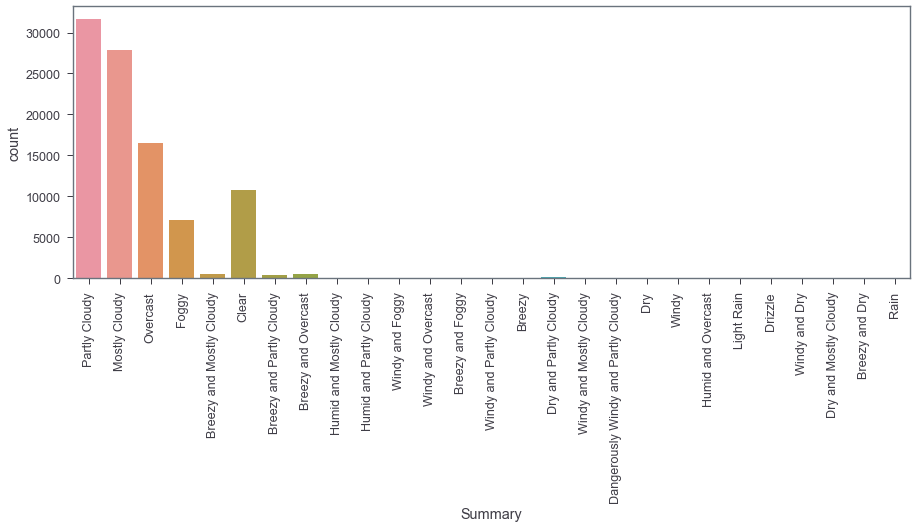

In [12]:
plt.figure(figsize=(15,5))
plt.xticks(rotation="90")
sns.countplot(x = "Summary", data = df)
plt.show()

In [73]:
o = df["Daily Summary"].value_counts()


20020

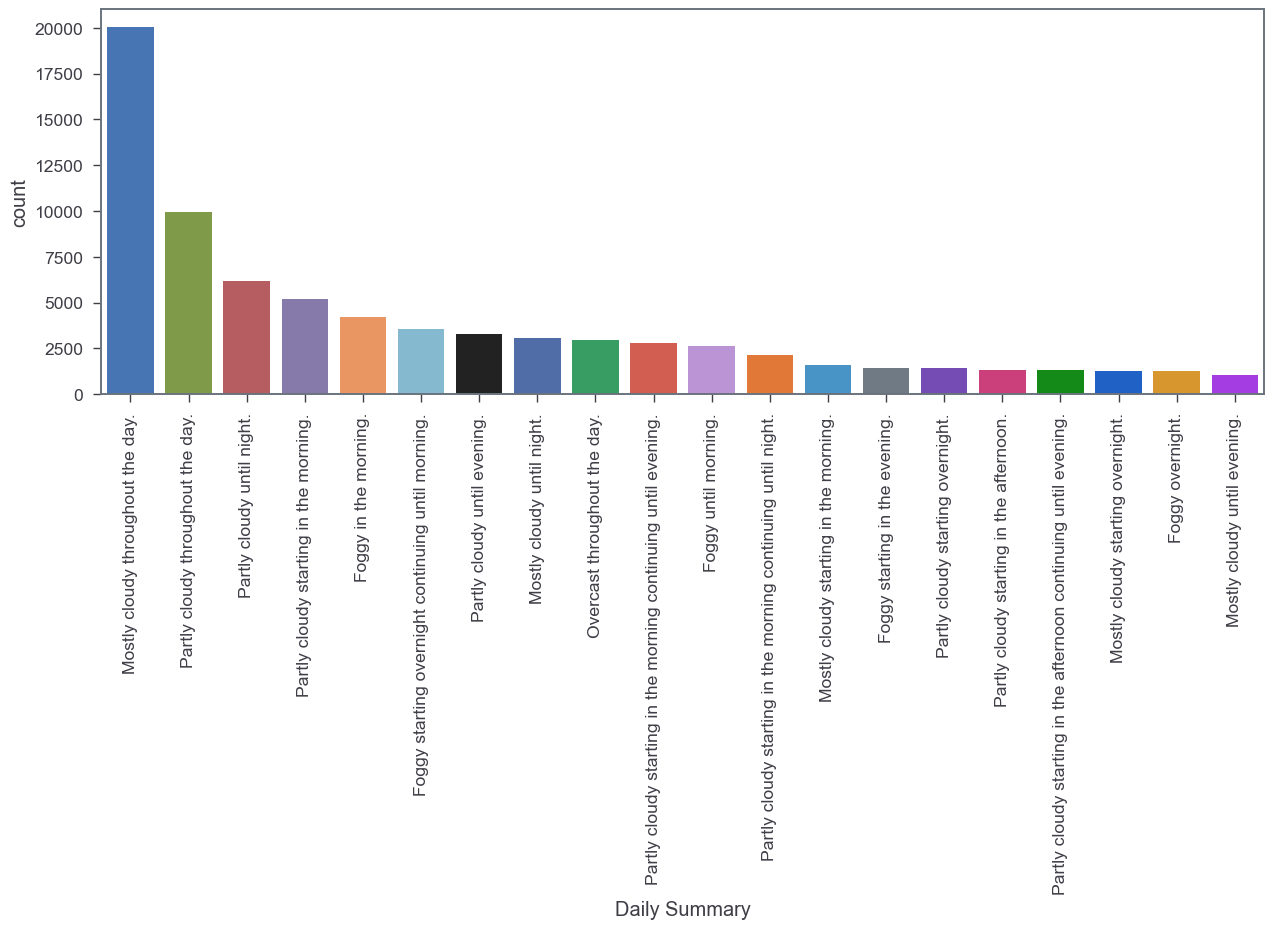

In [76]:
plt.figure(figsize=(15,5))
plt.xticks(rotation="90")
sns.countplot(x = "Daily Summary" , data = df , order = df.value_counts("Daily Summary").iloc[:20].index)
plt.show()

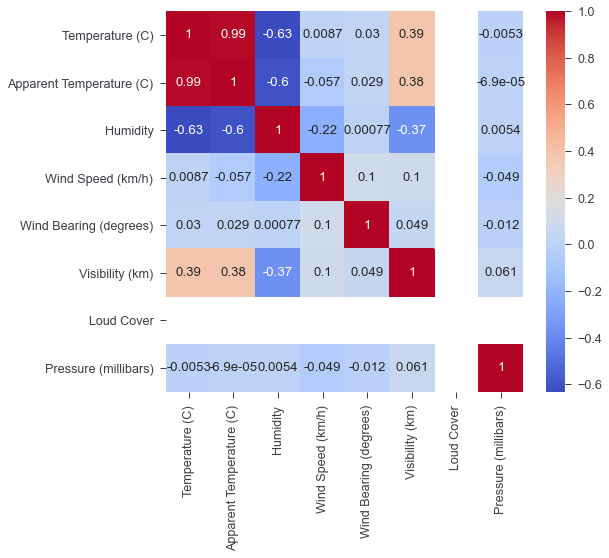

In [14]:
sns.heatmap(df.corr(),annot = True , cmap="coolwarm")
plt.show()

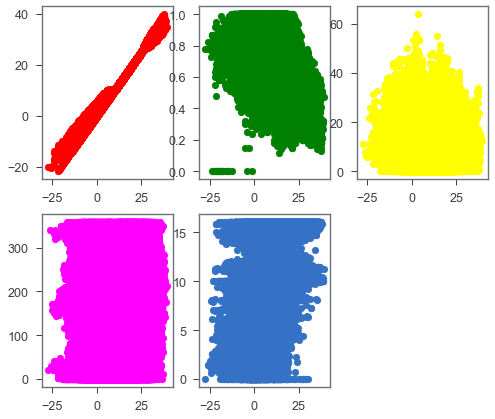

In [15]:
figure = plt.figure("Correlation Plot")
temperature = figure.add_subplot(2,3,1)
humidity = figure.add_subplot(2,3,2)
wind_speed = figure.add_subplot(2,3,3)
wind_bearing = figure.add_subplot(2,3,4)
visibility = figure.add_subplot(2,3,5)
temperature.scatter(df["Apparent Temperature (C)"],df["Temperature (C)"],color="red")
humidity.scatter(df["Apparent Temperature (C)"],df["Humidity"],color="green")
wind_speed.scatter(df["Apparent Temperature (C)"],df["Wind Speed (km/h)"],color="yellow")
wind_bearing.scatter(df["Apparent Temperature (C)"],df["Wind Bearing (degrees)"],color="magenta")
visibility.scatter(df["Apparent Temperature (C)"],df["Visibility (km)"])
plt.show()

In [16]:
encoder = LabelEncoder()
df = pd.get_dummies(df , columns = ["Summary"])
df["Daily Summary"] = encoder.fit_transform(df["Daily Summary"])
df["Precip Type"] = encoder.fit_transform(df["Precip Type"])

In [17]:
df.columns

Index(['Formatted Date', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary', 'Summary_Breezy',
       'Summary_Breezy and Dry', 'Summary_Breezy and Foggy',
       'Summary_Breezy and Mostly Cloudy', 'Summary_Breezy and Overcast',
       'Summary_Breezy and Partly Cloudy', 'Summary_Clear',
       'Summary_Dangerously Windy and Partly Cloudy', 'Summary_Drizzle',
       'Summary_Dry', 'Summary_Dry and Mostly Cloudy',
       'Summary_Dry and Partly Cloudy', 'Summary_Foggy',
       'Summary_Humid and Mostly Cloudy', 'Summary_Humid and Overcast',
       'Summary_Humid and Partly Cloudy', 'Summary_Light Rain',
       'Summary_Mostly Cloudy', 'Summary_Overcast', 'Summary_Partly Cloudy',
       'Summary_Rain', 'Summary_Windy', 'Summary_Windy and Dry',
       'Summary_Windy and Foggy', 'Summary_Windy and Mostly Cloudy',
       'Summar

In [18]:
df["Daily Summary"].unique()

array([197, 111,  33,  36, 143, 209, 132,  57,  35, 204, 170,  94, 118,
       166, 156, 188, 205, 187, 155,  95, 198, 120,  43,  60,  42, 119,
        47,  51, 162,  59,  63,  52,  41, 175, 169, 147,  91,  37, 150,
        83,  39, 112,  58,  97,  45, 148,  29, 154, 152, 144,  34,  18,
       183,  96,  84, 195,  98, 157, 128, 165, 193, 194,  61, 146,  28,
        82,  23, 149,  89,  79,  72,  80, 174, 171,  75,  40,  64,  48,
        62,  49, 181, 179,  20, 105, 202,  71,  19, 109,   3,  88, 208,
         2,  99, 104, 191, 164, 192,  85, 153, 159, 200, 178, 176, 103,
       110,  22,  76, 142, 190, 115, 121, 158, 134,  90, 182, 203,  16,
       160,  92, 107,  21, 108, 137, 136,  81, 126, 207, 201, 186,  15,
        55, 125,  32, 124,  54,  25, 106, 177,  74,  93,  56, 117,  50,
        44, 173,  53,  86, 141, 163, 167, 127,   6, 129, 180,   7, 151,
        66,  69,  65, 168,  14, 102,  38,   1, 130, 185, 184,  77, 172,
         9, 206,  87,  11,  73, 101, 100, 131,   0,  10, 139,  2

In [19]:
Y = df[["Apparent Temperature (C)"]]
X = df[["Temperature (C)"]]

In [20]:
X

,Temperature (C)
0,9.472222
1,9.355556
2,9.377778
3,8.288889
4,8.755556
...,...
96448,26.016667
96449,24.583333
96450,22.038889
96451,21.522222


In [21]:
Y

,Apparent Temperature (C)
0,7.388889
1,7.227778
2,9.377778
3,5.944444
4,6.977778
...,...
96448,26.016667
96449,24.583333
96450,22.038889
96451,21.522222


# Linear Regression With SKlearn

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,Y ,random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
regressor = LinearRegression()
r = regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
score = r2_score(y_test,y_pred)
print("The R2 Score is " , score)

The R2 Score is  0.9852959408365233


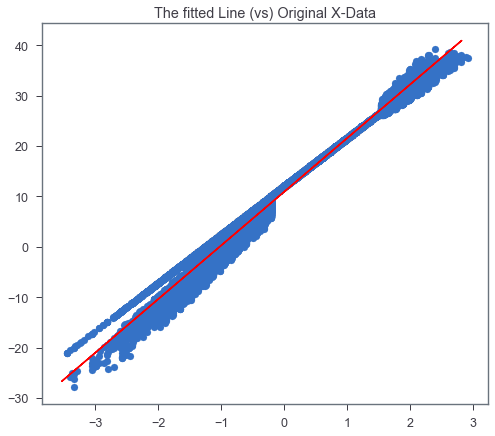

In [23]:
plt.scatter(X_train,y_train)
plt.plot(X_test,y_pred,color="red")
plt.title("The fitted Line (vs) Original X-Data")
plt.show()

In [24]:
X = sm.add_constant(X)
est = sm.OLS(Y, X)
est = est.fit()
print(est.summary())

                               OLS Regression Results                               
Dep. Variable:     Apparent Temperature (C)   R-squared:                       0.985
Model:                                  OLS   Adj. R-squared:                  0.985
Method:                       Least Squares   F-statistic:                 6.439e+06
Date:                      Fri, 01 Oct 2021   Prob (F-statistic):               0.00
Time:                              20:50:22   Log-Likelihood:            -1.6113e+05
No. Observations:                     95912   AIC:                         3.223e+05
Df Residuals:                         95910   BIC:                         3.223e+05
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

# Linear Regression From Scratch

In [25]:
Y = df["Apparent Temperature (C)"]
X = df["Temperature (C)"]

In [26]:
def gradient_descent(X,Y,learn_rate,max_iter):
    theta_0 , theta_1 = 0 , 0
    cost_list = []
    theta_0_list = []
    theta_1_list = []
    predicted=[]
    counter = 0
    for i in range(max_iter): 
        # calculate h(theta)
        predicted_Y = theta_0 + theta_1 * X
        predicted.append(predicted_Y)
        # calculate cost function
        cost_fun = sum((predicted_Y - Y)**2) / (2*len(Y))
        cost_list.append(cost_fun)
        # calculate gradient
        grad_0 = sum(predicted_Y - Y) / len(Y)
        grad_1 = sum((predicted_Y - Y)* X) / len(Y) 
        grad = np.array([grad_0,grad_1])
        # update thetas
        theta_0 = theta_0 - learn_rate * grad_0
        theta_1 = theta_1 - learn_rate * grad_1    
        theta_0_list.append(theta_0)
        theta_1_list.append(theta_1)
        counter += 1
        if len(cost_list) > 1 :
            if norm(grad) < 0.0001:
                break
            elif np.absolute(cost_list[i] - cost_list[i-1]) < 0.0001 :
                break
            elif np.absolute(norm([theta_0_list[i],theta_1_list[i]]) - norm([theta_0_list[i-1],theta_1_list[i-1]])) < 0.0001 :
                break
    return theta_0_list , theta_1_list , cost_list , predicted , theta_0_list[-1] , theta_1_list[-1] , counter

In [31]:
def My_LR_Model(X,Y,learn_rate,max_iter):
    X = X.to_numpy().reshape(-1,1)
    Y = Y.to_numpy().reshape(-1,1)
    X_train, X_test, y_train, y_test = train_test_split(X,Y , random_state=0)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    theta_0_list , theta_1_list , cost_list , predicted , optim_theta_0 , optim_theta_1 , counter = gradient_descent(X_train,y_train,learn_rate,max_iter)
    hypo = optim_theta_0 + optim_theta_1 * X_test
    score = r2_score(y_test,hypo)
    print("the score is : ",score , " , Count Equal " , counter )
    print("------------------------------------------------------------------------------")
    plt.scatter(X_train,y_train)
    plt.plot(X_train,predicted[-1] , color ="red")
    plt.title("The fitted Line (vs) Original X-Data")
    plt.show()

the score is :  0.9852959391240803  , Count Equal  6
------------------------------------------------------------------------------


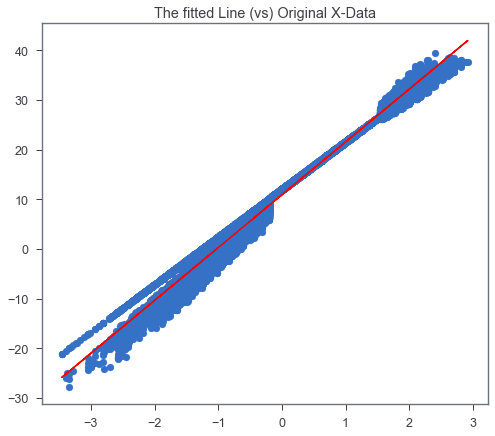

In [32]:
My_LR_Model(X,Y,0.9,300)

### There is no big difference between the two ways in the chosen parameters and it is almost identically 